In [5]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

In [6]:
%load_ext autoreload
%autoreload 2
import features
import utils

In [33]:
%matplotlib inline

In [7]:
path = "../INRIAPerson/train_64x128_H96/pos/crop001001a.png"

In [8]:
img = imageio.imread(path)

In [9]:
img = img / 255

In [10]:
img.shape

(160, 96, 4)

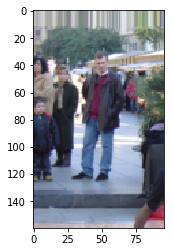

In [35]:
plt.imshow(img)

In [12]:
row, col = img.shape[0], img.shape[1]

In [13]:
row_off, col_off = (row - 128) // 2, (col - 64) // 2

In [14]:
cimg = img[row_off : row - row_off, col_off : col - col_off]

In [15]:
plt.imshow(cimg)

In [16]:
cimg = utils.load_image(path)

In [17]:
mag, theta = features.gradient(cimg)

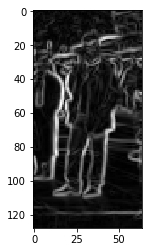

In [34]:
plt.imshow(mag, cmap = "gray")

In [20]:
import math

In [21]:
theta

array([[ 0.38050638,  0.55165498,  0.49934672, ..., -2.40565906,
        -2.07407076, -1.76819189],
       [ 1.10714872,  0.97074611, -1.05840687, ..., -2.50816677,
        -1.7577756 , -0.48689923],
       [ 0.38831872,  1.74546853, -2.16414647, ..., -0.3453008 ,
        -0.25732371, -0.15776874],
       ..., 
       [ 2.8753406 ,  2.03444394,  1.57079633, ..., -3.07917384,
         2.91479381, -2.97644398],
       [ 2.9562447 ,  2.74307021,  2.76860493, ..., -3.03671571,
         3.10315006,  3.10934577],
       [ 2.8753406 ,  2.55359005,  2.67794504, ..., -2.53604799,
        -3.03093543,  2.99270271]])

In [52]:
bins = np.linspace(0, math.pi, num = 9)

In [53]:
bins

array([ 0.        ,  0.39269908,  0.78539816,  1.17809725,  1.57079633,
        1.96349541,  2.35619449,  2.74889357,  3.14159265])

In [61]:
ori = features.bin_gradient(theta, num = 9)

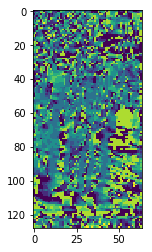

In [62]:
plt.imshow(ori)

In [63]:
ori.shape

(128, 64)

In [64]:
ori

array([[0, 1, 1, ..., 1, 2, 3],
       [2, 2, 5, ..., 1, 3, 6],
       [0, 4, 2, ..., 7, 7, 7],
       ..., 
       [7, 5, 4, ..., 0, 7, 0],
       [7, 6, 7, ..., 0, 7, 7],
       [7, 6, 6, ..., 1, 0, 7]])

In [32]:
theta

array([[ 0.38050638,  0.55165498,  0.49934672, ...,  0.73593359,
         1.0675219 ,  1.37340077],
       [ 1.10714872,  0.97074611,  2.08318579, ...,  0.63342588,
         1.38381706,  2.65469342],
       [ 0.38831872,  1.74546853,  0.97744618, ...,  2.79629185,
         2.88426894,  2.98382392],
       ..., 
       [ 2.8753406 ,  2.03444394,  1.57079633, ...,  0.06241881,
         2.91479381,  0.16514868],
       [ 2.9562447 ,  2.74307021,  2.76860493, ...,  0.10487694,
         3.10315006,  3.10934577],
       [ 2.8753406 ,  2.55359005,  2.67794504, ...,  0.60554466,
         0.11065722,  2.99270271]])

In [36]:
block = mag[:16, :16]

In [39]:
block

array([[ 0.12670976,  0.17958044,  0.14741134,  0.03921569,  0.10768259,
         0.11580253,  0.06678191,  0.10874843,  0.03941128,  0.20309031,
         0.08959733,  0.13864839,  0.11091871,  0.28630137,  0.17625259,
         0.03720327],
       [ 0.12276452,  0.18056258,  0.07199043,  0.21922235,  0.24326372,
         0.23404899,  0.13402359,  0.05448017,  0.05614832,  0.13269745,
         0.10353238,  0.03921569,  0.24278912,  0.31298933,  0.19996155,
         0.2185549 ],
       [ 0.18642924,  0.06769677,  0.20339298,  0.2469343 ,  0.0533391 ,
         0.18970018,  0.15228618,  0.05275931,  0.09180157,  0.07069708,
         0.19911376,  0.19151554,  0.30401643,  0.1540932 ,  0.16083213,
         0.20906044],
       [ 0.10551862,  0.26365077,  0.18460553,  0.11997693,  0.13333333,
         0.20214155,  0.29578612,  0.169673  ,  0.21407599,  0.18498002,
         0.21019754,  0.19911376,  0.21118293,  0.05614832,  0.09053644,
         0.13035898],
       [ 0.249413  ,  0.18925378,  0

In [42]:
nblock = features.contrast_normalization(block)

In [43]:
nblock

array([[ 0.03749038,  0.05313355,  0.04361548,  0.01160298,  0.0318607 ,
         0.03426319,  0.01975917,  0.03217605,  0.01166085,  0.06008956,
         0.0265097 ,  0.04102274,  0.03281819,  0.08470971,  0.05214892,
         0.01100755],
       [ 0.03632308,  0.05342414,  0.02130024,  0.06486264,  0.07197591,
         0.06924949,  0.03965437,  0.01611938,  0.01661294,  0.03926199,
         0.03063275,  0.01160298,  0.07183548,  0.09260604,  0.05916383,
         0.06466516],
       [ 0.05515995,  0.02002985,  0.06017911,  0.07306194,  0.01578176,
         0.05612774,  0.04505783,  0.01561022,  0.02716188,  0.02091757,
         0.05891299,  0.05666486,  0.08995118,  0.04559248,  0.04758637,
         0.06185597],
       [ 0.03122043,  0.07800794,  0.05462035,  0.0354983 ,  0.03945014,
         0.05980884,  0.08751602,  0.05020217,  0.06333995,  0.05473116,
         0.06219241,  0.05891299,  0.06248397,  0.01661294,  0.02678756,
         0.0385701 ],
       [ 0.07379533,  0.05599566,  0

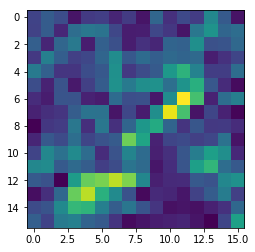

In [44]:
plt.imshow(block)

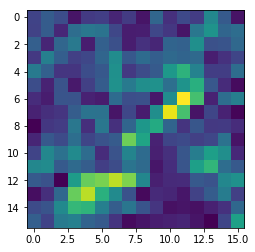

In [45]:
plt.imshow(nblock)

In [80]:
features = features.HOG(mag, ori)

cell_rows: 16, cell_cols: 8
ci: 0, cj: 0
ci: 0, cj: 1
ci: 0, cj: 2
ci: 0, cj: 3
ci: 0, cj: 4
ci: 0, cj: 5
ci: 0, cj: 6
ci: 1, cj: 0
ci: 1, cj: 1
ci: 1, cj: 2
ci: 1, cj: 3
ci: 1, cj: 4
ci: 1, cj: 5
ci: 1, cj: 6
ci: 2, cj: 0
ci: 2, cj: 1
ci: 2, cj: 2
ci: 2, cj: 3
ci: 2, cj: 4
ci: 2, cj: 5
ci: 2, cj: 6
ci: 3, cj: 0
ci: 3, cj: 1
ci: 3, cj: 2
ci: 3, cj: 3
ci: 3, cj: 4
ci: 3, cj: 5
ci: 3, cj: 6
ci: 4, cj: 0
ci: 4, cj: 1
ci: 4, cj: 2
ci: 4, cj: 3
ci: 4, cj: 4
ci: 4, cj: 5
ci: 4, cj: 6
ci: 5, cj: 0
ci: 5, cj: 1
ci: 5, cj: 2
ci: 5, cj: 3
ci: 5, cj: 4
ci: 5, cj: 5
ci: 5, cj: 6
ci: 6, cj: 0
ci: 6, cj: 1
ci: 6, cj: 2
ci: 6, cj: 3
ci: 6, cj: 4
ci: 6, cj: 5
ci: 6, cj: 6
ci: 7, cj: 0
ci: 7, cj: 1
ci: 7, cj: 2
ci: 7, cj: 3
ci: 7, cj: 4
ci: 7, cj: 5
ci: 7, cj: 6
ci: 8, cj: 0
ci: 8, cj: 1
ci: 8, cj: 2
ci: 8, cj: 3
ci: 8, cj: 4
ci: 8, cj: 5
ci: 8, cj: 6
ci: 9, cj: 0
ci: 9, cj: 1
ci: 9, cj: 2
ci: 9, cj: 3
ci: 9, cj: 4
ci: 9, cj: 5
ci: 9, cj: 6
ci: 10, cj: 0
ci: 10, cj: 1
ci: 10, cj: 2
ci: 10, cj: 3
ci: 10

In [82]:
features.shape

(3780,)

In [83]:
features

array([ 0.10830161,  0.23826335,  0.20585688, ...,  0.04883776,
        0.16961836,  0.00951164])

In [84]:
import train

In [90]:
X, y = train.feature_extraction("pos", rload = False)

image: 0
image: 1
shape of features: (2, 3780)


In [89]:
X, y

(array([[ 0.27017909,  0.26609039,  0.27017909, ...,  0.10951887,
          0.12765243,  0.0032721 ],
        [ 0.25857143,  0.06755037,  0.10288503, ...,  0.        ,
          0.        ,  0.        ]]), array([ 1.,  1.]))